In [ ]:
# To Do:
'''
- create a model to predict yesterday's returns to today
- X = returns yesterday
- Y = returns today
- no sklearn
- divide train/test
- tell model to predict today's reutrns as exactly yesterday's
- shift function
'''

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
# read data
returns = pd.read_pickle('/Users/nishb/Documents/IX/Internship/returns.pkl')
returns

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Insert Model Here

In [22]:
daysToShift = 1

def modelShiftDays(days):
    new_df = returns.shift(days, axis=0)
    return new_df

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

df_pred.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotting Data

<AxesSubplot:xlabel='date', ylabel='actual'>

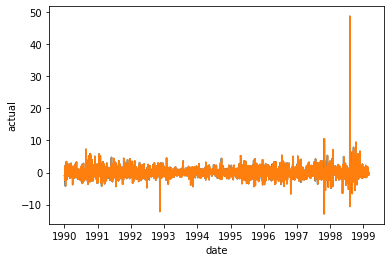

In [24]:
# For the first listed stock:

# create dataframe for all given days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]]
df['predicted'] = df_pred[returns.columns[0]]
df['date'] = returns.index
df.reset_index(drop=True, inplace = True)
df.head()

sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

Text(0.5, 1.0, 'Predicted vs Actual')

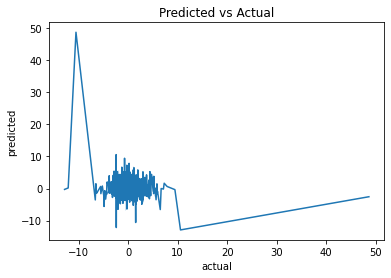

In [25]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

In [46]:
# For the first listed stock:

# create dataframe with all relevant data for first 30 days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]].iloc[:30]
df['predicted'] = df_pred[returns.columns[0]].iloc[:30]
df['date'] = returns.index[:30]
df.reset_index(drop=True, inplace = True)
df.head()


,actual,predicted,date
0,NaN,NaN,1990-01-02
1,-0.835165,NaN,1990-01-03
2,-0.797872,-0.835165,1990-01-04
3,-2.546917,-0.797872,1990-01-05
4,2.017423,-2.546917,1990-01-08


<AxesSubplot:xlabel='date', ylabel='actual'>

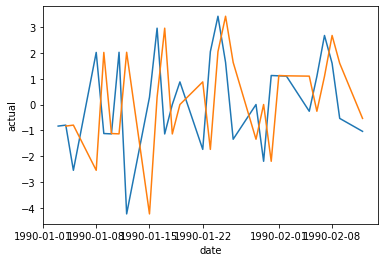

In [47]:
sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

Text(0.5, 1.0, 'Predicted vs Actual')

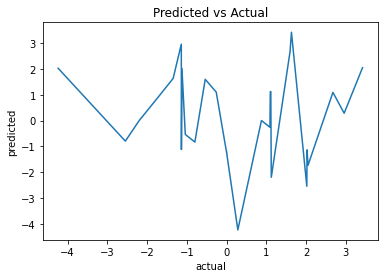

In [17]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

### Testing for Multiple Stocks

In [87]:
stock = df_pred.iloc[:30, 4]
stock

date
1990-01-02         NaN
1990-01-03         NaN
1990-01-04    0.361421
1990-01-05   -0.180060
1990-01-08   -1.079730
1990-01-09    0.000000
1990-01-10   -0.364707
1990-01-11   -1.281146
1990-01-12    0.926980
1990-01-15   -2.018002
1990-01-16   -1.309658
1990-01-17    1.137073
1990-01-18   -1.124289
1990-01-19    2.086895
1990-01-22    1.113828
1990-01-23   -2.021716
1990-01-24   -0.939144
1990-01-25    0.379219
1990-01-26   -3.016892
1990-01-29    0.581525
1990-01-30   -0.193643
1990-01-31   -0.194019
1990-02-01    0.971979
1990-02-02    0.385049
1990-02-05    0.767144
1990-02-06   -0.380652
1990-02-07   -1.146319
1990-02-08    0.000000
1990-02-09   -0.386537
1990-02-12   -0.579284
Name: 916328, dtype: float64

In [69]:
daysToShift = 1

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

df_pred.head()


,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9660J1,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813
date,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405
1990-01-09,-1.123596,-2.962370,-0.404606,-1.098524,-0.364707,-1.043478,1.639344,0.000000,0.432900,-3.293257
1990-01-10,-1.136364,-2.145215,0.406250,-0.555363,-1.281146,-1.142355,-1.612903,-2.000000,-2.586207,-2.000000
1990-01-11,2.022989,0.252951,1.151572,-1.396161,0.926980,0.000000,1.639344,1.551020,-0.212389,0.000000
1990-01-12,-4.236142,-3.111859,-1.538462,-2.513274,-2.018002,-3.288889,-3.225806,-1.004823,-2.447676,-2.757860


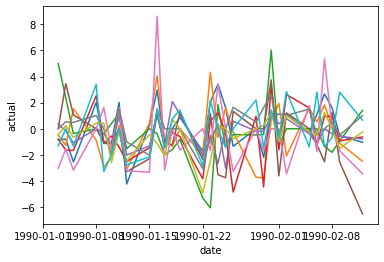

In [97]:
numStocks = 10
for i in range(numStocks):
    #stock = df_pred.iloc[:30, i]
    #pred_list[name] = stock
    
    # create dataframe with all relevant data for first 30 days
    df_actual = pd.DataFrame()
    df_actual['actual'] = returns[returns.columns[i]].iloc[:30]
    df_actual['date'] = returns.index[:30]
    df.reset_index(drop=True, inplace = True)
    sns.lineplot(data=df_actual, x='date', y='actual')
    
df_actualreturn = pd.DataFrame()
df_actualreturn = returns[returns.columns[0:numStocks]].iloc[:30]
df_actualreturn

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813
date,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789
1990-01-05,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000
1990-01-08,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333
1990-01-09,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405
1990-01-10,-1.123596,-2.962370,-0.404606,-1.098524,-0.364707,-1.043478,1.639344,0.000000,0.432900,-3.293257
1990-01-11,-1.136364,-2.145215,0.406250,-0.555363,-1.281146,-1.142355,-1.612903,-2.000000,-2.586207,-2.000000
1990-01-12,2.022989,0.252951,1.151572,-1.396161,0.926980,0.000000,1.639344,1.551020,-0.212389,0.000000


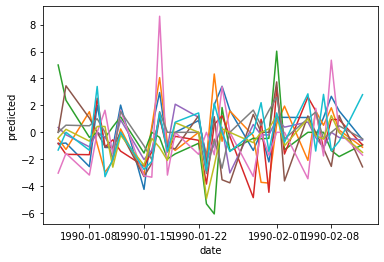

In [98]:
for i in range(numStocks):
    #stock = df_pred.iloc[:30, i]
    #pred_list[name] = stock
    
    # create dataframe with all relevant data for first 30 days
    df_p= pd.DataFrame()
    df_p['predicted'] = df_pred[returns.columns[i]].iloc[:30]
    df_p['date'] = returns.index[:30]
    df.reset_index(drop=True, inplace = True)
    sns.lineplot(data=df_p, x='date', y='predicted')
    
df_predreturn = pd.DataFrame()
df_predreturn = df_pred[returns.columns[0:numStocks]].iloc[:30]
df_predreturn 

### Getting Top Returns

In [113]:
maxValuesObj = df_predreturn.max(axis=1)
Stock = df_predreturn.idxmax(axis=1)
print('Top Returns Per Day')
print(maxValuesObj, Stock)

Top Returns Per Day
date
1990-01-02         NaN
1990-01-03         NaN
1990-01-04    5.000000
1990-01-05    3.454545
1990-01-08    1.531023
1990-01-09    3.405405
1990-01-10    1.639344
1990-01-11    0.406250
1990-01-12    2.022989
1990-01-15   -1.004823
1990-01-16    0.434028
1990-01-17    8.620690
1990-01-18    0.000000
1990-01-19    2.086895
1990-01-22    1.438435
1990-01-23    0.000000
1990-01-24    4.332756
1990-01-25    3.418414
1990-01-26    1.630674
1990-01-29    1.652174
1990-01-30    2.202899
1990-01-31    1.617021
1990-02-01    6.026786
1990-02-02    1.946903
1990-02-05    2.857143
1990-02-06    1.785714
1990-02-07    2.816901
1990-02-08    5.357143
1990-02-09    1.595968
1990-02-12    2.796421
dtype: float64 date
1990-01-02       NaN
1990-01-03       NaN
1990-01-04    904261
1990-01-05    923024
1990-01-08    921795
1990-01-09    929813
1990-01-10    936365
1990-01-11    904261
1990-01-12    905270
1990-01-15    902355
1990-01-16    921795
1990-01-17    936365
1990-01-18   